In [6]:
import pandas as pd

df = pd.read_csv("../data/train.tsv", sep="\t", header=None, quoting=3)

df.columns = [
    "id", "label", "statement", "subject", "speaker", "job", "state", "party",
    "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts",
    "pants_on_fire_counts", "context"
]

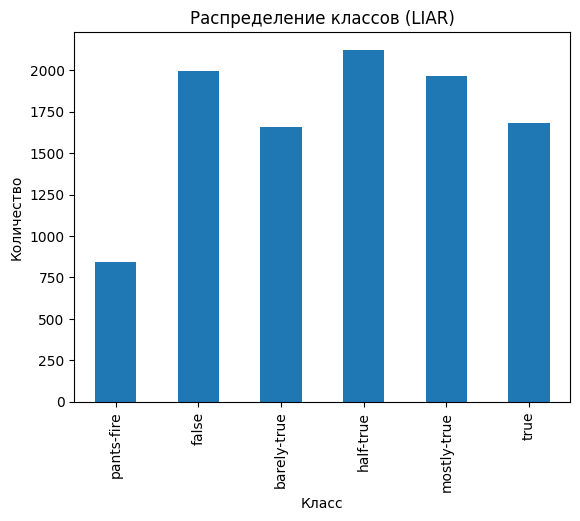

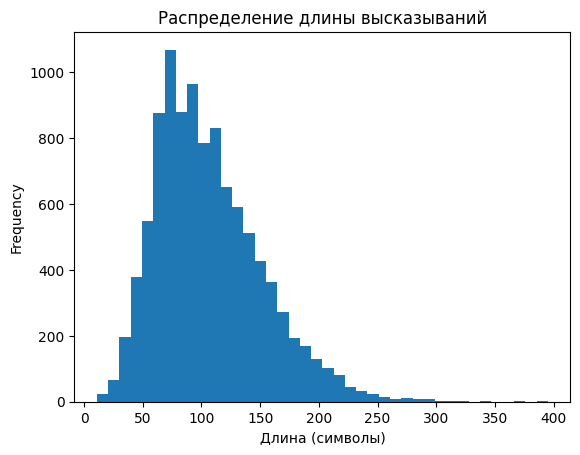

In [7]:
import matplotlib.pyplot as plt

ax = df['label'].value_counts().reindex(["pants-fire","false","barely-true","half-true","mostly-true","true"]).plot(kind='bar')
ax.set_title("Распределение классов (LIAR)")
ax.set_xlabel("Класс")
ax.set_ylabel("Количество")
plt.show()

df['text_length'] = df['statement'].astype(str).str.len()
ax = df['text_length'].plot(kind='hist', bins=40)
ax.set_title("Распределение длины высказываний")
ax.set_xlabel("Длина (символы)")
plt.show()


In [8]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/doncheck/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

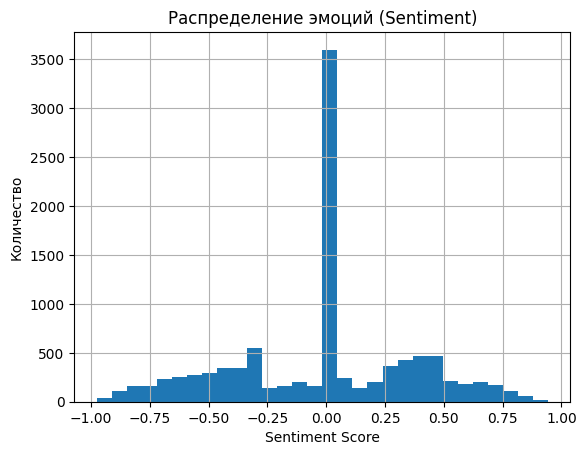

In [ ]:
# Analyzing the sentiment of statements in the dataset using the VADER sentiment analysis tool.
# The 'compound' score ranges from -1 (negative) to 1 (positive), with 0 being neutral.

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['statement'].apply(lambda x: sia.polarity_scores(x)['compound'])

ax = df['sentiment'].hist(bins=30)
ax.set_title('Распределение эмоций (Sentiment)')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Количество')
plt.show()